In [60]:
# Import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import joblib

In [61]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
##########################################################################################
# Defining dataset path.
# Kindly update this path as per your local system before you run this script.
dataset_path = r"C:\Users\admin\Downloads\Hackathon\Data\train_product_data.csv"
test_dataset_path = r"C:\Users\admin\Downloads\Hackathon\Data\test_data.csv"
##########################################################################################

In [63]:
# Read the dataset
df = pd.read_csv(dataset_path)
print('Size of Training Dataset, Rows : ',df.shape[0], ' Columns : ',df.shape[1])

Size of Training Dataset, Rows :  14999  Columns :  15


In [64]:
## EDA on dataset
# Get first 5 rows of datasets.
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [65]:
# Check info of all the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [66]:
# Display basic statistics.
df.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [67]:
# Copy Dataset and get null values count in each column.
df_copy = df.copy()
df_copy.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

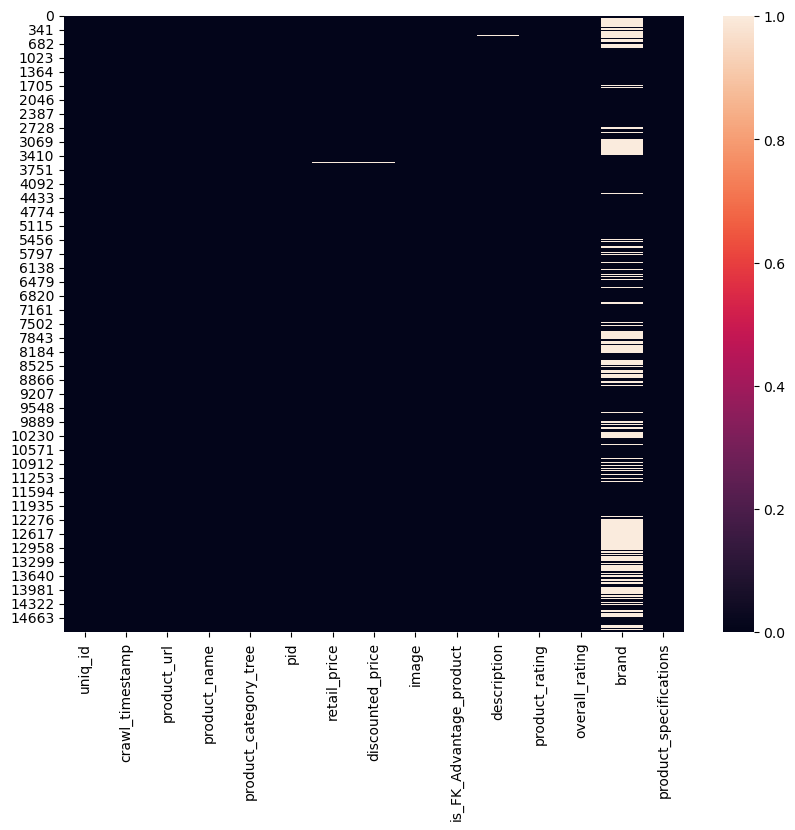

In [68]:
# Plot heatman on null values in each column.
plt.figure(figsize =(10,8))
sns.heatmap(df_copy.isna())
plt.savefig('heatmap_null_values.png')

In [69]:
# Drop rows where 'retail_price' & 'discounted_price' is null.
df_copy.dropna(subset=['retail_price','discounted_price'], inplace=True)
df_copy.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4701
product_specifications        4
dtype: int64

In [70]:
df_copy.shape

(14942, 15)

In [71]:
# convert 'crawl_timestamp' column into datetime type:
df_copy['crawl_timestamp'] = pd.to_datetime(df_copy['crawl_timestamp'])
df_copy['crawl_timestamp'].info()

<class 'pandas.core.series.Series'>
Index: 14942 entries, 0 to 14998
Series name: crawl_timestamp
Non-Null Count  Dtype              
--------------  -----              
14942 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 233.5 KB


In [72]:
# Get Day, Month & Year seprated from timestamp column.
df_copy['crwal_year'] = df_copy['crawl_timestamp'].apply(lambda x : x.year)
df_copy['crwal_month'] = df_copy['crawl_timestamp'].apply(lambda x : x.month)
df_copy['crwal_day'] = df_copy['crawl_timestamp'].apply(lambda x : x.day)
df_copy.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crwal_year,crwal_month,crwal_day
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,25
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23+00:00,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",2016,3,25


In [73]:
# Get the average top 10 retail and discounted prices of products.
main_grouped_retail = df_copy.groupby('product_category_tree')['retail_price'].mean()
main_grouped_discounted = df_copy.groupby('product_category_tree')['discounted_price'].mean()
sorted_retail_grouped = main_grouped_retail.sort_values(ascending=False)
sorted_discounted_grouped = main_grouped_discounted.sort_values(ascending=False)
pd.DataFrame(sorted_retail_grouped)

,retail_price
product_category_tree,
Jewellery,8259.763789
Computers,3396.326996
Automotive,2997.619251
Watches,2891.715649
Home Decor & Festive Needs,2694.547753
Mobiles & Accessories,1810.378590
Footwear,1786.521739
"Bags, Wallets & Belts",1765.401274
Tools & Hardware,1337.333333


In [74]:
pd.DataFrame(sorted_discounted_grouped)

,discounted_price
product_category_tree,
Jewellery,6028.645684
Watches,2584.557252
Computers,2215.815589
Home Decor & Festive Needs,1856.428371
Automotive,1202.491979
Mobiles & Accessories,1122.969974
Footwear,1094.912118
Tools & Hardware,878.898667
"Bags, Wallets & Belts",860.541401


In [75]:
# Analyze price distribution by category
price_stats = df_copy.groupby('product_category_tree')['retail_price'].describe()
pd.DataFrame(price_stats)

,count,mean,std,min,25%,50%,75%,max
product_category_tree,,,,,,,,
Automotive,935.0,2997.619251,2244.984509,210.0,1050.00,2800.0,4900.00,44880.0
Baby Care,222.0,1103.306306,1222.773783,70.0,529.00,859.5,999.00,12500.0
"Bags, Wallets & Belts",157.0,1765.401274,1234.937359,399.0,899.00,1499.0,2000.00,8400.0
Clothing,5293.0,1288.673720,1592.169527,149.0,749.00,999.0,1418.00,69999.0
Computers,526.0,3396.326996,4559.275821,169.0,999.00,2399.0,3999.00,38890.0
Footwear,1081.0,1786.521739,1155.254642,169.0,999.00,1599.0,2295.00,19995.0
Home Decor & Festive Needs,712.0,2694.547753,5091.097632,249.0,850.00,1299.0,2085.50,47620.0
Jewellery,3209.0,8259.763789,14632.737706,125.0,599.00,999.0,2989.00,49999.0
Kitchen & Dining,608.0,903.074013,1815.056969,35.0,499.00,650.0,897.25,34168.0


In [76]:
# Distribution of price discounts percentage offered.
df_copy['discount_percentage'] = ((df_copy['retail_price'] - df_copy['discounted_price']) / df_copy['retail_price'])*100
df_copy.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crwal_year,crwal_month,crwal_day,discount_percentage
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25,62.062062
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,25,50.050050
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25,61.802575
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,25,60.050042
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23+00:00,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",2016,3,25,50.071531


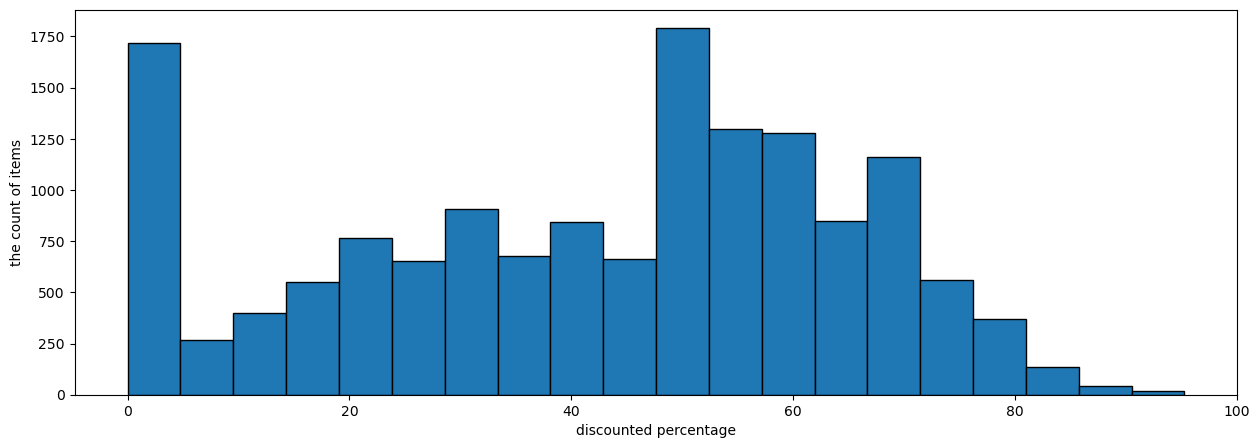

In [77]:
# Plot Histogram
plt.figure(figsize=(15,5))
plt.hist(df_copy['discount_percentage'],bins=20,edgecolor = 'black')
plt.xlabel('discounted percentage')
plt.ylabel('the count of items')
plt.savefig('Histogram_discount_percent.png')
plt.show()

In [78]:
# Are there any significant price differences between FK Advantage products and others?
# retail prices:
df_copy.groupby('is_FK_Advantage_product')['retail_price'].describe()

,count,mean,std,min,25%,50%,75%,max
is_FK_Advantage_product,,,,,,,,
False,14261.0,3196.959540,9343.389652,35.0,695.0,1000.0,1998.0,571230.0
True,681.0,1693.204112,2911.954679,79.0,750.0,999.0,1599.0,38890.0


In [79]:
# discounted prices:
df_copy.groupby('is_FK_Advantage_product')['discounted_price'].describe()

,count,mean,std,min,25%,50%,75%,max
is_FK_Advantage_product,,,,,,,,
False,14261.0,2129.675408,7872.048027,35.0,349.0,499.0,999.0,571230.0
True,681.0,1209.390602,2555.804566,79.0,412.0,750.0,999.0,38890.0


In [80]:
## Product popularity:
# Which product categories have the most products?
group_count_main_cat = df_copy.groupby('product_category_tree')['product_category_tree'].value_counts().sort_values(ascending=False)
pd.DataFrame(group_count_main_cat)

,count
product_category_tree,
Clothing,5293
Jewellery,3209
Footwear,1081
Automotive,935
Mobiles & Accessories,766
Home Decor & Festive Needs,712
Kitchen & Dining,608
Computers,526
Watches,524


In [81]:
# What are the top 10 most frequently occurring brands?
brand_grouping_count = df_copy.groupby('brand')['brand'].value_counts().sort_values(ascending=False)
pd.DataFrame(brand_grouping_count.head(10))

,count
brand,
Allure Auto,468
Regular,307
Slim,284
Voylla,273
Karatcraft,211
Black,164
White,154
DailyObjects,144
Radiant Bay,132


In [82]:
# Which products have the highest overall ratings?
df_copy['overall_rating'].value_counts()

overall_rating
No rating available    13472
5                        499
4                        200
3                        132
1                        126
2                         61
4.5                       52
3.7                       43
4.2                       41
3.5                       37
4.3                       36
4.1                       21
4.8                       21
4.7                       19
3.6                       18
2.5                       17
3.8                       16
3.2                       15
3.3                       13
3.9                       13
2.3                       11
4.4                       10
3.4                        9
2.7                        8
4.6                        8
2.8                        8
3.1                        6
2.2                        6
2.4                        5
2.9                        5
1.5                        3
1.3                        3
1.7                        3
4.9                        2

In [83]:
# change the type into float and remove 'no available rating string' and convert it into 0
df_copy['overall_rating'] = df_copy['overall_rating'].replace('No rating available',0)
df_copy['overall_rating'] = df_copy['overall_rating'].astype('float64')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  14942 non-null  object             
 1   crawl_timestamp          14942 non-null  datetime64[ns, UTC]
 2   product_url              14942 non-null  object             
 3   product_name             14942 non-null  object             
 4   product_category_tree    14942 non-null  object             
 5   pid                      14942 non-null  object             
 6   retail_price             14942 non-null  float64            
 7   discounted_price         14942 non-null  float64            
 8   image                    14939 non-null  object             
 9   is_FK_Advantage_product  14942 non-null  bool               
 10  description              14941 non-null  object             
 11  product_rating           14942 no

In [84]:
df_copy[['product_name','overall_rating']].sort_values('overall_rating',ascending=False).head(20)

,product_name,overall_rating
8035,Sonata 8098YM01 Analog Watch - For Women,5.0
6991,Revine Men's Printed Casual Shirt,5.0
11572,X-Doria Back Cover for iPad / 2,5.0
8549,i-KitPit Pouch for Lenovo A369i,5.0
7527,Dolphin Miles Women Wedges,5.0
12485,Nucode Graphic Print Men's Round Neck T-Shirt,5.0
4739,United Kadhai NA L,5.0
8053,Sonata 7089SL01 Yuva Analog Watch - For Men,5.0
14086,Bosch 2 607 001 531 Extra Hard Screwdriver Bit...,5.0
7531,Dolphin Miles Women Wedges,5.0


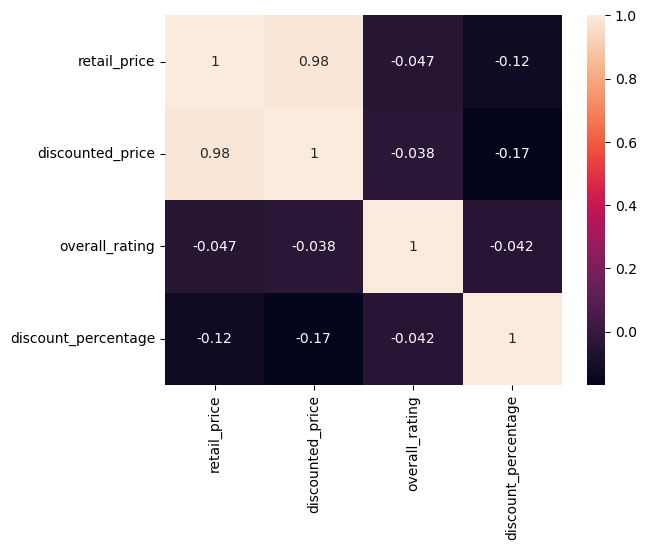

In [85]:
num_col = df_copy.select_dtypes(include=['int64', 'float64']).columns
cat_col = df_copy.select_dtypes(exclude=['int64', 'float64']).columns
matrix = df_copy[num_col].corr()
sns.heatmap(matrix,annot=True)
plt.savefig('heatmap.png')
plt.show()

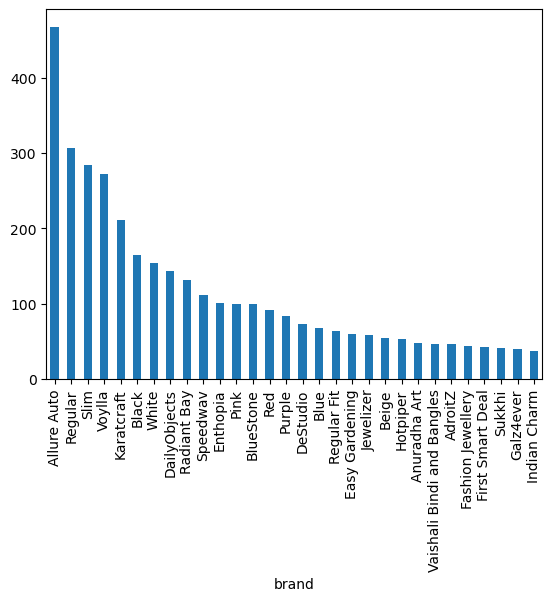

<Figure size 2000x1000 with 0 Axes>

In [86]:
brand_grouping_count.head(30).plot(kind='bar')
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

In [87]:
# How do brand prices and ratings compare?
correlation = df_copy['retail_price'].corr(df_copy['overall_rating'])
correlation

-0.04657453060198366

In [88]:
brand_stats = df_copy.groupby('brand')[['retail_price', 'overall_rating']].describe().sort_values('brand',ascending=True)
brand_stats

retail_price                                                   \
                    count         mean         std     min     25%     50%   
brand                                                                        
1OAK                  2.0   849.000000   70.710678   799.0   824.0   849.0   
3D Mat                1.0  7250.000000         NaN  7250.0  7250.0  7250.0   
3a AUTOCARE          23.0  2580.434783  453.205535  2250.0  2250.0  2300.0   
3a Autocare          18.0  2650.500000  604.146286  1259.0  2250.0  2600.0   
3kFactory             1.0   399.000000         NaN   399.0   399.0   399.0   
...                   ...          ...         ...     ...     ...     ...   
youniqueshop          1.0   810.000000         NaN   810.0   810.0   810.0   
zDelhi.com            1.0  4499.000000         NaN  4499.0  4499.0  4499.0   
zaidis                1.0   150.000000         NaN   150.0   150.0   150.0   
zasmina               2.0   700.000000    0.000000   700.0   700.0   700.0   
 Tarkan               1.0  1999.000000         NaN  1999.0  1999.0  1999.0   

                             overall_rating                                \
                 75%     max          count mean       std  min  25%  50%   
brand                                                                       
1OAK           874.0   899.0            2.0  0.0  0.000000  0.0  0.0  0.0   
3D Mat        7250.0  7250.0            1.0  0.0       NaN  0.0  0.0  0.0   
3a AUTOCARE   2800.0  3500.0           23.0  0.0  0.000000  0.0  0.0  0.0   
3a Autocare   3200.0  3500.0           18.0  0.5  1.465285  0.0  0.0  0.0   
3kFactory      399.0   399.0            1.0  0.0       NaN  0.0  0.0  0.0   
...              ...     ...            ...  ...       ...  ...  ...  ...   
youniqueshop   810.0   810.0            1.0  0.0       NaN  0.0  0.0  0.0   
zDelhi.com    4499.0  4499.0            1.0  5.0       NaN  5.0  5.0  5.0   
zaidis         150.0   150.0            1.0  0.0       NaN  0.0  0.0  0.0   
zasmina        700.0   700.0            2.0  0.0  0.000000  0.0  0.0  0.0   
 Tarkan       1999.0  1999.0            1.0  0.0       NaN  0.0  0.0  0.0   

                        
              75%  max  
brand                   
1OAK          0.0  0.0  
3D Mat        0.0  0.0  
3a AUTOCARE   0.0  0.0  
3a Autocare   0.0  5.0  
3kFactory     0.0  0.0  
...           ...  ...  
youniqueshop  0.0  0.0  
zDelhi.com    5.0  5.0  
zaidis        0.0  0.0  
zasmina       0.0  0.0  
 Tarkan       0.0  0.0  

[2301 rows x 16 columns]

In [89]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  14942 non-null  object             
 1   crawl_timestamp          14942 non-null  datetime64[ns, UTC]
 2   product_url              14942 non-null  object             
 3   product_name             14942 non-null  object             
 4   product_category_tree    14942 non-null  object             
 5   pid                      14942 non-null  object             
 6   retail_price             14942 non-null  float64            
 7   discounted_price         14942 non-null  float64            
 8   image                    14939 non-null  object             
 9   is_FK_Advantage_product  14942 non-null  bool               
 10  description              14941 non-null  object             
 11  product_rating           14942 no

In [90]:
# removing unwanted features
todelete=['crawl_timestamp','product_url','image',"is_FK_Advantage_product","product_rating","overall_rating","product_specifications"]
df_copy=df_copy.drop(todelete,axis=1)
df_copy.head()

,uniq_id,product_name,product_category_tree,pid,retail_price,discounted_price,description,brand,crwal_year,crwal_month,crwal_day,discount_percentage
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,2016,3,25,62.062062
1,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW,2016,3,25,50.050050
2,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,2016,3,25,61.802575
3,ce5a6818f7707e2cb61fdcdbba61f5ad,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,2016,3,25,60.050042
4,29c8d290caa451f97b1c32df64477a2c,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,2016,3,25,50.071531


In [91]:
## Cleaning Data
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [92]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [93]:
#applying function to description column by converting to string
df_copy['description'] = df_copy['description'].astype(str)
df_copy['description'] = df_copy['description'].apply(clean_text)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14942 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uniq_id                14942 non-null  object 
 1   product_name           14942 non-null  object 
 2   product_category_tree  14942 non-null  object 
 3   pid                    14942 non-null  object 
 4   retail_price           14942 non-null  float64
 5   discounted_price       14942 non-null  float64
 6   description            14942 non-null  object 
 7   brand                  10241 non-null  object 
 8   crwal_year             14942 non-null  int32  
 9   crwal_month            14942 non-null  int32  
 10  crwal_day              14942 non-null  int32  
 11  discount_percentage    14942 non-null  float64
dtypes: float64(3), int32(3), object(6)
memory usage: 1.3+ MB


In [94]:
## Model Training
# Creating X, y Variables
X, y = df_copy['description'], df_copy['product_category_tree']
# Setting up train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [95]:
#TfidVectorizer Pipeline
tvc_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('clf1', MultinomialNB())
])

In [96]:
## Hyperparameter Tuning
tf_params = {
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'],
 'clf1__alpha': [1, 1e-1, 1e-2]
 
}

In [97]:
# Setting up GridSearch for TfidVectorizer
clf = GridSearchCV(tvc_pipe, tf_params, cv=5, verbose =1, n_jobs = -1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('clf1', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf1__alpha': [1, 0.1, 0.01],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [98]:
# Save both to models
joblib.dump(clf,'TfidVectorizer.pkl')
print(clf.score(X_test, y_test))# Scoring Training data on TFIDFVectorizer
print(clf.score(X_train, y_train))# Scoring Testing data on TFIDFVectorizer

0.979389721627409
0.9971443869355703


In [99]:
#Classification report of CountVEctorizer
predicted_clf=clf.predict(X_test)
print(classification_report(y_test,predicted_clf))

                             precision    recall  f1-score   support

                Automotive        0.98      0.99      0.99       232
                 Baby Care        0.77      0.76      0.76        49
     Bags, Wallets & Belts        0.91      0.84      0.88        38
                  Clothing        0.99      0.99      0.99      1351
                 Computers        0.98      0.96      0.97       116
                  Footwear        0.99      0.99      0.99       262
Home Decor & Festive Needs        0.90      1.00      0.95       163
                 Jewellery        1.00      1.00      1.00       872
          Kitchen & Dining        0.99      0.98      0.99       135
     Mobiles & Accessories        0.98      0.98      0.98       179
         Pens & Stationery        0.84      0.78      0.81        60
          Tools & Hardware        0.98      0.91      0.94        92
    Toys & School Supplies        0.84      0.85      0.85        61
                   Watches       

In [100]:
## Predict the Product categories on Test dataset now.
df_test = pd.read_csv(test_dataset_path)
df_test.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [101]:
# predict data on test dataset.
df_test['Predicted_category'] = clf.predict(df_test['description'])

In [102]:
# Get the predicted result
df_test.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Predicted_category
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Jewellery
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl...",Jewellery
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Mobiles & Accessories
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection...",Jewellery
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl...",Jewellery


In [103]:
# Export the dataset with predicted values.
df_test.to_csv('TestDataset_withCategories.csv')